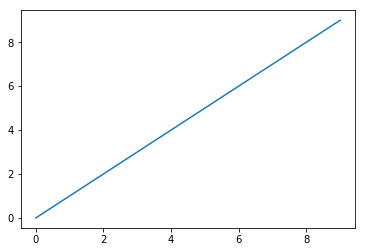

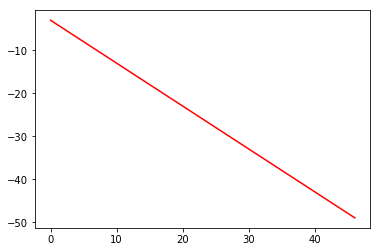

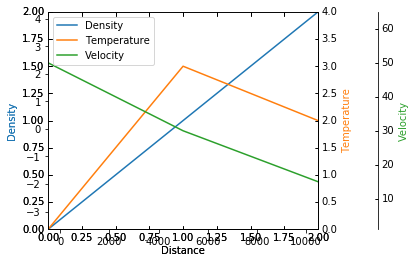

In [3]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlim(0, 2)
host.set_ylim(0, 2)

host.set_xlabel("Distance")
host.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

p1, = host.plot([0, 1, 2], [0, 1, 2], label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], label="Velocity")

par1.set_ylim(0, 4)
par2.set_ylim(1, 65)

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

plt.draw()
plt.show()

In [2]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

def multipage(filename, figs=None, dpi=200):
    pp = PdfPages(filename)
    if figs is None:
        figs = [plt.figure(n) for n in plt.get_fignums()]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()
    
#First create some figures,

import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.figure()
plt.plot(np.arange(10))

fig2 = plt.figure()
plt.plot(-np.arange(3, 50), 'r-')

#By default multipage will print all of the open figures,

multipage('multipage.pdf')

'''
The only gotcha here is that all figures are rendered as vector (pdf) graphics. 
If you want your figure to utilize raster graphics (i.e. if the files are too large as vectors), 
you could use the rasterized=True option when plotting quantities with many points. 
In that case the dpi option that I included might be useful, for example:
'''
fig3 = plt.figure()
plt.plot(np.random.randn(10000), 'g-', rasterized=True)

multipage('multipage_w_raster.pdf', [fig2, fig3], dpi=250)


In [4]:
# d = Pandas Dataframe, 
# ys = [ [cols in the same y], [cols in the same y], [cols in the same y], .. ] 
def chart(d,ys):

    from itertools import cycle
    fig, ax = plt.subplots()

    axes = [ax]
    for y in ys[1:]:
        # Twin the x-axis twice to make independent y-axes.
        axes.append(ax.twinx())

    extra_ys =  len(axes[2:])

    # Make some space on the right side for the extra y-axes.
    if extra_ys>0:
        temp = 0.85
        if extra_ys<=2:
            temp = 0.75
        elif extra_ys<=4:
            temp = 0.6
        if extra_ys>5:
            print ('you are being ridiculous')
        fig.subplots_adjust(right=temp)
        right_additive = (0.98-temp)/float(extra_ys)
    # Move the last y-axis spine over to the right by x% of the width of the axes
    i = 1.
    for ax in axes[2:]:
        ax.spines['right'].set_position(('axes', 1.+right_additive*i))
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        ax.yaxis.set_major_formatter(matplotlib.ticker.OldScalarFormatter())
        i +=1.
    # To make the border of the right-most axis visible, we need to turn the frame
    # on. This hides the other plots, however, so we need to turn its fill off.

    cols = []
    lines = []
    line_styles = cycle(['-','-','-', '--', '-.', ':', '.', ',', 'o', 'v', '^', '<', '>',
               '1', '2', '3', '4', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_'])
    colors = cycle(matplotlib.rcParams['axes.color_cycle'])
    for ax,y in zip(axes,ys):
        ls=line_styles.next()
        if len(y)==1:
            col = y[0]
            cols.append(col)
            color = colors.next()
            lines.append(ax.plot(d[col],linestyle =ls,label = col,color=color))
            ax.set_ylabel(col,color=color)
            #ax.tick_params(axis='y', colors=color)
            ax.spines['right'].set_color(color)
        else:
            for col in y:
                color = colors.next()
                lines.append(ax.plot(d[col],linestyle =ls,label = col,color=color))
                cols.append(col)
            ax.set_ylabel(', '.join(y))
            #ax.tick_params(axis='y')
    axes[0].set_xlabel(d.index.name)
    lns = lines[0]
    for l in lines[1:]:
        lns +=l
    labs = [l.get_label() for l in lns]
    axes[0].legend(lns, labs, loc=0)

    plt.show()

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-4-07dc0f613a1d>, line 23)